# NOTEBOOK DEL SQL CON EL DATASET LIMPIO

**Integrantes**

1.  *David Stivens Ordoñez*
2.   *Sebastian Montañez*
3.   *Santiago Henao Gutierrez*

## DEPENDENCIAS Y LIBRERIAS

### DEPENDENCIAS

In [2]:
%pip install PyMySQL
%pip install mysql-connector-python
%pip install PyMySQL
%pip install SQLAlchemy 
%pip install pandas pd

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### LIBRERIAS

In [3]:
from sqlalchemy import create_engine, MetaData, Table, Column, Integer, String, Float # type: ignore
from sqlalchemy.orm import sessionmaker # type: ignore
from sqlalchemy.exc import SQLAlchemyError # Nos servirá para validar la conexión # type: ignore
import pymysql # type: ignore
import pandas as pd # type: ignore
import mysql.connector # type: ignore
import mysql.connector # Importa el módulo para conectar con MySQL # type: ignore
from mysql.connector import errorcode # Importa los códigos de error de MySQL # type: ignore
import pandas as pd # Importa pandas para manejar datos # type: ignore
import mysql.connector # Importa el conector de MySQL # type: ignore
from mysql.connector import errorcode # type: ignore # Importa los códigos de error de MySQL

## BASE DE DATOS

### DATOS DE CREACION BD

In [4]:
user = "root"
password = "708090"
host = 'localhost' #ESTO SE CAMBIA SI ES REMOTO
database_name = 'db_superstore'

In [5]:
config = {
    'user': user,
    'password': password,
    'host': host,
    'database': database_name,
    'raise_on_warnings': True
}

### SQL (CREACION DATABASE Y TABLAS)

In [6]:
try:
    # Conectar al servidor MySQL sin especificar base de datos
    conn = mysql.connector.connect(
        host=config['host'],
        user=config['user'],
        password=config['password']
        # No se especifica la base de datos aquí
    )
    cursor = conn.cursor()

    # Verificar si la base de datos ya existe
    cursor.execute(f"SHOW DATABASES LIKE '{database_name}';")
    database_exists = cursor.fetchone()

    if not database_exists:
        # Crear la base de datos si no existe
        cursor.execute(f"CREATE DATABASE {database_name};")
        print(f"Base de datos '{database_name}' creada exitosamente.")
    else:
        print(f"La base de datos '{database_name}' ya existe.")

except mysql.connector.Error as err:
    if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print("Usuario o contraseña incorrectos.")
    elif err.errno == errorcode.ER_NO_SUCH_TABLE:
        print("La tabla no existe.")
    else:
        print(err)

finally:
    # Verificar si 'conn' está definido y si está conectado antes de cerrar
    if 'conn' in locals() and conn.is_connected():
        conn.close()
        print("Conexión cerrada.")

La base de datos 'db_superstore' ya existe.
Conexión cerrada.


In [7]:
try:
    # Conectar al servidor MySQL usando la configuración especificada
    conn = mysql.connector.connect(**config)
    cursor = conn.cursor()

    # Seleccionar la base de datos
    cursor.execute(f"USE {database_name};")

    # Crear las tablas si no existen
    create_table_Orders_query = """
    CREATE TABLE IF NOT EXISTS Orders (
        Order_ID VARCHAR(50),
        Order_Date DATE,
        Ship_Date DATE,
        Ship_Mode VARCHAR(50),
        Customer_ID VARCHAR(50),
        Customer_Name VARCHAR(200),
        Segment VARCHAR(50),
        City VARCHAR(50),
        State VARCHAR(50),
        Country VARCHAR(50),
        Region VARCHAR(50),
        Market VARCHAR(50),
        Product_ID VARCHAR(20),
        Category VARCHAR(50),
        Sub_Category VARCHAR(50),
        Product_Name VARCHAR(255),
        Sales FLOAT,
        Quantity INT,
        Discount FLOAT,
        Profit FLOAT,
        Shipping_Cost FLOAT,
        Order_Priority VARCHAR(50)
    );
    """

    create_table_People_query = """
    CREATE TABLE IF NOT EXISTS People (
        Person VARCHAR(50),
        Region VARCHAR(50)
    );
    """

    create_table_Returns_query = """
    CREATE TABLE IF NOT EXISTS Returns (
        Order_ID VARCHAR(50),
        Region VARCHAR(50)
    );
    """

    cursor.execute(create_table_Orders_query)
    print("Tabla 'Orders' creada exitosamente o ya existe.")

    cursor.execute(create_table_Returns_query)
    print("Tabla 'Returns' creada exitosamente o ya existe.")

    cursor.execute(create_table_People_query)
    print("Tabla 'People' creada exitosamente o ya existe.")

except mysql.connector.Error as err:
    if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print("Usuario o contraseña incorrectos.")
    elif err.errno == errorcode.ER_NO_SUCH_TABLE:
        print("La tabla no existe.")
    else:
        print(err)

finally:
    conn.close()

1050: Table 'orders' already exists


### CARGUE DE DATOS

In [8]:
df_Orders_Cleaned = "C:/Users/dqvdd/OneDrive - Universidad Autonoma de Occidente/UAO 2024-03 - BIG DATA/GESTION Y ALMACENAMIENTO DE DATOS/PROYECTO/df_Orders_Cleaned.csv"
df_Returns_Cleaned = "C:/Users/dqvdd/OneDrive - Universidad Autonoma de Occidente/UAO 2024-03 - BIG DATA/GESTION Y ALMACENAMIENTO DE DATOS/PROYECTO/df_Returns_Cleaned.csv"
df_People_Cleaned = "C:/Users/dqvdd/OneDrive - Universidad Autonoma de Occidente/UAO 2024-03 - BIG DATA/GESTION Y ALMACENAMIENTO DE DATOS/PROYECTO/df_People_Cleaned.csv"

In [9]:
try:
    connection_string = f"mysql+mysqlconnector://{user}:{password}@{host}/{database_name}"
    engine = create_engine(connection_string)

    df_orders = pd.read_csv(df_Orders_Cleaned, sep=';')
    df_orders_to_sql = df_orders.to_sql('orders', engine, if_exists='replace', index=False)

    df_returns = pd.read_csv(df_Returns_Cleaned, sep=';')
    df_returns_to_sql = df_returns.to_sql('returns', engine, if_exists='replace', index=False)

    df_people = pd.read_csv(df_People_Cleaned, sep=';')
    df_people_to_sql = df_people.to_sql('people', engine, if_exists='replace', index=False)

except mysql.connector.Error as err:
    print(f"Error al cargar datos en la tabla 'people': {err}")
finally:
    print("datos cargados")

datos cargados


## CRUD

### Create

In [15]:
try:

    # Conectar al servidor MySQL usando la configuración especificada
    conn = mysql.connector.connect(**config)
    cursor = conn.cursor()

    # Seleccionar la base de datos
    cursor.execute(f"USE {database_name};")

    # Insertar un nuevo registro en la tabla

    insert_query = "INSERT INTO db_superstore.orders (Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Country,Region,Market,Product_ID,Category,SubCategory,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority) VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s); "

    # Lista de valores con 3 registros
    values = [
        ("CA-2016-152156", "2024-10-02", "2024-10-03", "Second Class", "123456", "David Ordoñez", "Consumer", "Cali", "Valle del Cauca", "Colombia", "South America", "LATAM", "FUR-BO-10001798", "Furniture", "Bookcases", "Bush Somerset Collection Bookcase", 261.96, 2, 0, 41.9136, 7.89, "High"),
        ("CA-2016-152156", "2024-10-02", "2024-10-03", "Second Class", "654321", "Sebastian Montañez", "Consumer", "Cali", "Valle del Cauca", "Colombia", "South America", "LATAM", "FUR-BO-10001798", "Furniture", "Bookcases", "Bush Somerset Collection Bookcase", 392.94, 3, 0, 41.9136, 7.89, "High"),
        ("CA-2016-152156", "2024-10-02", "2024-10-03", "Second Class", "142536", "Santiago Henao", "Consumer", "Cali", "Valle del Cauca", "Colombia", "South America", "LATAM", "FUR-BO-10001798", "Furniture", "Bookcases", "Bush Somerset Collection Bookcase", 130.98, 1, 0, 41.9136, 7.89, "High")
    ]
    
    cursor.executemany(insert_query, values)
    conn.commit()
    
    print("Registro creado exitosamente.")
except mysql.connector.Error as err:
    print(f"Error: {err}")
finally:
    cursor.close()
    conn.close()

Registro creado exitosamente.


**SS en WorkBench y StreamLit**

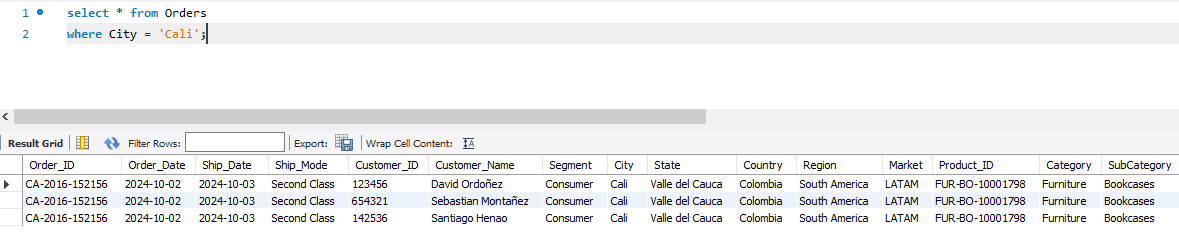

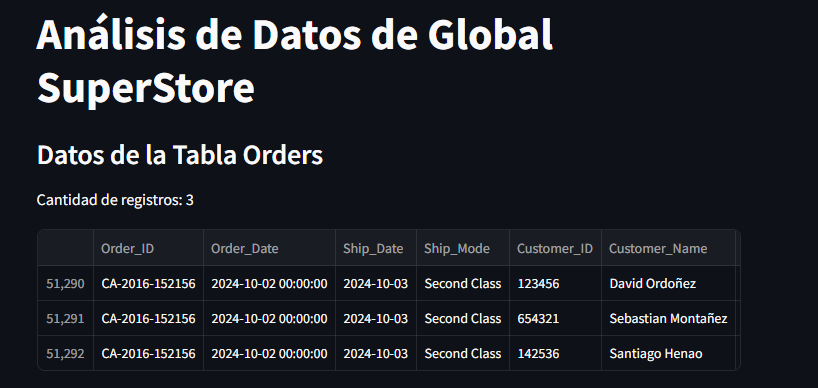

### Read

In [11]:
try:
    # Conectar al servidor MySQL usando la configuración especificada
    conn = mysql.connector.connect(**config)
    cursor = conn.cursor()

    # Seleccionar la base de datos
    cursor.execute(f"USE {database_name};")

    # Leer los registros de la tabla
    select_query = "SELECT * FROM orders LIMIT 10"
    
    cursor.execute(select_query)
    result = cursor.fetchall()
    
    for row in result:
        print(row)
except mysql.connector.Error as err:
    print(f"Error: {err}")
finally:
    cursor.close()
    conn.close()


('CA-2014-AB10015140-41954', '2014-11-11', '2014-11-13', 'First Class', 'AB-100151402', 'Aaron Bergman', 'Consumer', 'Oklahoma City', 'Oklahoma', 'United States', 'Central US', 'USCA', 'TEC-PH-5816', 'Technology', 'Phones', 'Samsung Convoy 3', 221.98, 2, 0.0, 62.15, 40.77, 'High')
('IN-2014-JR162107-41675', '2014-02-05', '2014-02-07', 'Second Class', 'JR-162107', 'Justin Ritter', 'Corporate', 'Wollongong', 'New South Wales', 'Australia', 'Oceania', 'Asia Pacific', 'FUR-CH-5379', 'Furniture', 'Chairs', 'Novimex Executive Leather Armchair, Black', 3709.4, 9, 0.1, -288.77, 923.63, 'Critical')
('IN-2014-CR127307-41929', '2014-10-17', '2014-10-18', 'First Class', 'CR-127307', 'Craig Reiter', 'Consumer', 'Brisbane', 'Queensland', 'Australia', 'Oceania', 'Asia Pacific', 'TEC-PH-5356', 'Technology', 'Phones', 'Nokia Smart Phone, with Caller ID', 5175.17, 9, 0.1, 919.97, 915.49, 'Medium')
('ES-2014-KM1637548-41667', '2014-01-28', '2014-01-30', 'First Class', 'KM-1637548', 'Katherine Murray', 'H

### Update

In [19]:
try:
    # Conectar al servidor MySQL usando la configuración especificada
    conn = mysql.connector.connect(**config)
    cursor = conn.cursor()

    # Seleccionar la base de datos
    cursor.execute(f"USE {database_name};")

    # Consulta para actualizar la ciudad de Sebastian Montañez
    update_query = """
        UPDATE db_superstore.orders 
        SET City = %s, State = %s
        WHERE Customer_Name = %s;
    """

    # Valores para la actualización
    values = ("Bogotá","Bogota", "Sebastian Montañez")

    # Ejecutar la consulta de actualización
    cursor.execute(update_query, values)
    conn.commit()

    print(f"Registro actualizado exitosamente. Filas afectadas: {cursor.rowcount}")
except mysql.connector.Error as err:
    print(f"Error: {err}")
finally:
    cursor.close()
    conn.close()


Registro actualizado exitosamente. Filas afectadas: 1


**SS en WorkBench y StreamLit**

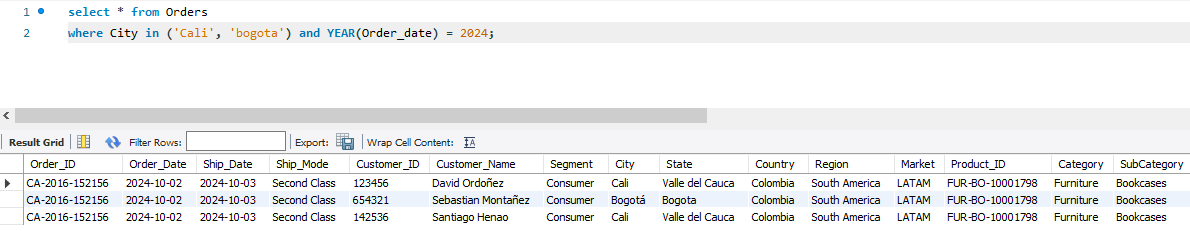

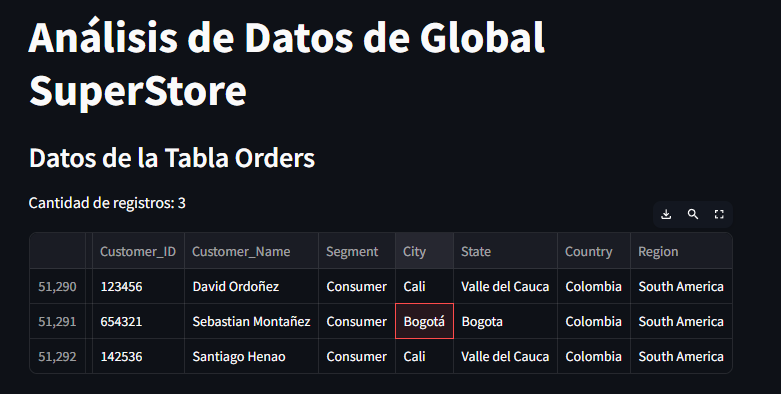

### Delete

In [20]:
try:
    # Conectar al servidor MySQL usando la configuración especificada
    conn = mysql.connector.connect(**config)
    cursor = conn.cursor()

    # Seleccionar la base de datos
    cursor.execute(f"USE {database_name};")

    # Consulta para eliminar el registro de Santiago Henao
    delete_query = """
        DELETE FROM db_superstore.orders
        WHERE Customer_Name = %s;
    """

    # Valor para la eliminación
    values = ("Santiago Henao",)

    # Ejecutar la consulta de eliminación
    cursor.execute(delete_query, values)
    conn.commit()

    print(f"Registro eliminado exitosamente. Filas afectadas: {cursor.rowcount}")
except mysql.connector.Error as err:
    print(f"Error: {err}")
finally:
    cursor.close()
    conn.close()


Registro eliminado exitosamente. Filas afectadas: 1


**SS en WorkBench y StreamLit**

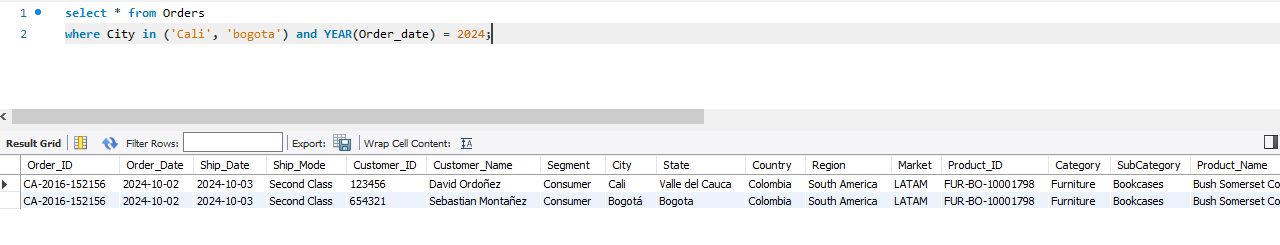

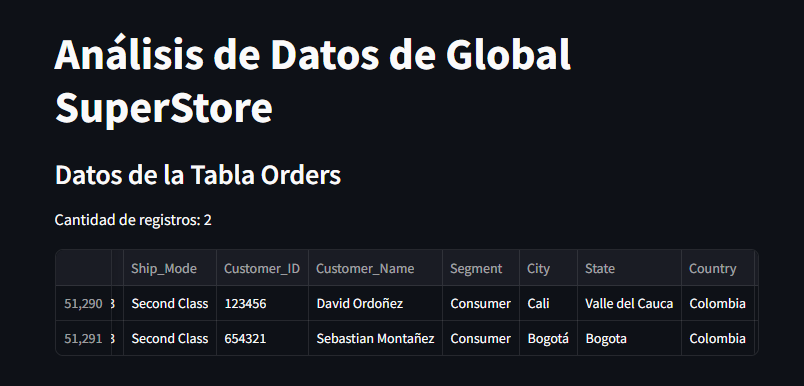